### Data Preprocessing

In [3]:
import pandas as pd
import warnings
import contractions
import json
import datetime
import gensim
import spacy
import joblib
import matplotlib.pyplot as plt 

from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

warnings.filterwarnings(action="ignore")

/Users/micocomia/.pyenv/versions/3.9.1/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


---

#### I. Import CSV files

In [39]:
def import_csv_as(path):
    reviews = pd.read_csv(path)
    reviews['title_review'] = reviews['title'] + ' ' + reviews['review']
    reviews = reviews.drop(['userName','title','review','isEdited','app_id','developerResponse','app_name'],axis=1)
    return reviews

In [40]:
def import_csv_ps(path):
    reviews = pd.read_csv(path)
    reviews['title_review'] = reviews['content'].astype(str)
    reviews['date'] = reviews['at']
    reviews['rating'] = reviews['score']
    reviews = reviews[['date','rating','title_review']]
    return reviews

In [41]:
gcash_reviews_as = import_csv_as('../../Data/Raw/App Store/GCash/gcash_0613-1427.csv')
paymaya_reviews_as = import_csv_as('../../Data/Raw/App Store/PayMaya/paymaya_0613-1402.csv')

In [42]:
gcash_reviews_ps = import_csv_ps('../../Data/Raw/Play Store/gcash_reviews_playstore.csv')
paymaya_reviews_ps = import_csv_ps('../../Data/Raw/Play Store/paymaya_reviews_playstore.csv')

In [43]:
gcash_reviews_as

,date,rating,title_review
0,2018-12-29 15:24:59,3,It is starting to become pretty annoying Almos...
1,2020-05-16 07:33:32,5,Actually ok. This app gets so many negative re...
2,2020-02-04 00:25:57,3,Cash In Concern A little bit disappointed when...
3,2019-12-10 09:43:52,1,Frustrating and slow and you’re a bunch of thi...
4,2018-06-26 18:43:31,1,Payments don’t post. My payment via gcash did ...
...,...,...,...
4862,2016-01-16 11:52:50,1,FIX THIS!!! This is one of the crucial apps fo...
4863,2015-11-09 08:20:37,1,Can't access because they can't process my tra...
4864,2015-09-19 14:58:01,1,Waste of time downloading Compatibility says c...
4865,2015-09-09 11:45:00,1,Cant log in Useless app.cant access my gcash w...


In [44]:
paymaya_reviews_as

,date,rating,title_review
0,2020-03-30 01:10:54,5,VERY BAD SERVICE I have been contacting them a...
1,2020-08-06 03:55:14,1,Very poor customer service There should be a z...
2,2020-05-02 01:58:12,1,App is great but service is not I really loved...
3,2020-04-09 01:32:02,1,Make your app trustworthy really Comeon this i...
4,2020-12-01 07:59:56,1,The new update... Ok so lets be honest I love ...
...,...,...,...
2564,2016-11-15 05:07:55,1,Verification code - time waster Your verificat...
2565,2015-11-29 18:38:50,4,"Nice One Very nice idea, we can buy now online..."
2566,2016-04-09 15:51:13,2,UPDATE PLEASE! Error occured when i'm trying t...
2567,2016-03-16 10:26:02,1,Am I doing something wrong I can't receive the...


In [45]:
gcash_reviews_ps

,date,rating,title_review
0,2021-06-02 18:32:37,1,Good for mobile online deals.
1,2021-06-02 18:32:14,1,Ilang beses nang naulit na nag load ako nag ba...
2,2021-06-02 18:32:07,4,Its a great experience and convenient
3,2021-06-02 18:31:31,5,Ok na ok sya para sa mga easy transaction lalo...
4,2021-06-02 18:31:25,5,very helpful and contented
...,...,...,...
176511,2019-04-03 09:46:14,5,I love it
176512,2019-04-03 09:38:52,4,I love the save money and invest feature of th...
176513,2019-04-03 09:38:16,1,Amex does not work and support is basically br...
176514,2019-04-03 09:33:42,5,satisfied


In [46]:
paymaya_reviews_ps

,date,rating,title_review
0,2021-06-15T10:22:11.000Z,5,I rated 1 star yesterday and if there's lower ...
1,2021-06-15T10:08:54.000Z,2,I cant do anything with my money! It always sa...
2,2021-06-15T10:08:14.000Z,5,Masyado na kaming maraming papel dito sa bahay...
3,2021-06-15T10:04:31.000Z,4,upgrading account and changing no is disappoin...
4,2021-06-15T09:56:32.000Z,5,I'm super stressed with my past e-wallet app s...
...,...,...,...
104558,2021-06-12T06:18:19.000Z,5,Very good in service easy to send get cash
104559,2021-06-12T06:08:23.000Z,4,Bakit walang alloutsurf sa load.
104560,2021-06-12T04:54:57.000Z,1,Keep contacting the support about the duplicat...
104561,2021-06-12T04:03:56.000Z,5,I like this apps promise


In [12]:
gcash_paymaya = ['#007dfe', '#92c83e']

In [13]:
gcash_color = ['#1470cc', '#3399ff' , '#007dfe', 'lightgray', '#70b8ff']
paymaya_color = ['#92c83e', '#b4e36b', '#9bbf63', '#5d8a15', '#5c7535']

In [49]:
def side_by_side(df, df2, color, title):
    start_date = "2020-01-01"
    end_date = "2021-05-31"
    
    # Limit dates
    df['date']= pd.to_datetime(df['date'])
    df = df.loc[(df['date'] >= start_date) & (df['date'] <= end_date)]
    df2['date']= pd.to_datetime(df2['date'])
    df2['date'] = df2['date'].dt.strftime('%Y-%m-%d')
    df2['date']= pd.to_datetime(df2['date'])
    df2 = df2.loc[(df2['date'] >= start_date) & (df2['date'] <= end_date)]
    
    df1 = df.rename(columns = {'date':'Month'}, inplace= False)
    df1 = df1.set_index('Month')
    group = df1.groupby([pd.Grouper(freq='M'), 'rating']).count().unstack(fill_value=0).stack()
    group = group.reset_index()
    group = group.pivot(index = 'Month', columns='rating', values='title_review')
    group['total'] = group.sum(axis=1)
    group[1] = (group[1]/group['total'])*100
    group[2] = (group[2]/group['total'])*100
    group[3] = (group[3]/group['total'])*100
    group[4] = (group[4]/group['total'])*100
    group[5] = (group[5]/group['total'])*100
    
    df3 = df2.rename(columns = {'date':'Month'}, inplace= False)
    df3 = df3.set_index('Month')
    group2 = df3.groupby([pd.Grouper(freq='M'), 'rating']).count().unstack(fill_value=0).stack()
    group2 = group2.reset_index()
    group2 = group2.pivot(index = 'Month', columns='rating', values='title_review')
    group2['total'] = group2.sum(axis=1)
    group2[1] = (group2[1]/group2['total'])*100
    group2[2] = (group2[2]/group2['total'])*100
    group2[3] = (group2[3]/group2['total'])*100
    group2[4] = (group2[4]/group2['total'])*100
    group2[5] = (group2[5]/group2['total'])*100

    one_star = group[[1]].copy()
    one_star = one_star.rename(columns={1: 'GCash'}, inplace=False)
    one_star['PayMaya'] = group2[1]
        
    five_star = group[[5]].copy()
    five_star = five_star.rename(columns={5: 'GCash'}, inplace=False)
    five_star['PayMaya'] = group2[5]
    
    fig, axes = plt.subplots(1,2, figsize=(30,10))
        
    ax = one_star.plot(kind='bar', title = f'GCash & PayMaya 1-Star {title} Reviews Distribution per Month',  
                    color = color, ax = axes[0])
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_ylim([0,100])
    ax.legend(bbox_to_anchor= (1.01, 0.2))
    ax.set_xticklabels([x.strftime("%b %Y") for x in one_star.index], rotation=45)

    ax2 = five_star.plot(kind='bar', title = f'GCash & PayMaya 5-Star {title} Reviews Distribution per Month',  
                    color = color, ax = axes[1])
    ax2.spines["left"].set_visible(False)
    ax2.spines["right"].set_visible(False)
    ax2.spines["top"].set_visible(False)
    ax2.set_ylim([0,100])
    ax2.legend(bbox_to_anchor= (1.01, 0.2))
    ax2.set_xticklabels([x.strftime("%b %Y") for x in one_star.index], rotation=45)
    
    fig.savefig(f'{title}_Compare_v3.png', bbox_inches='tight')

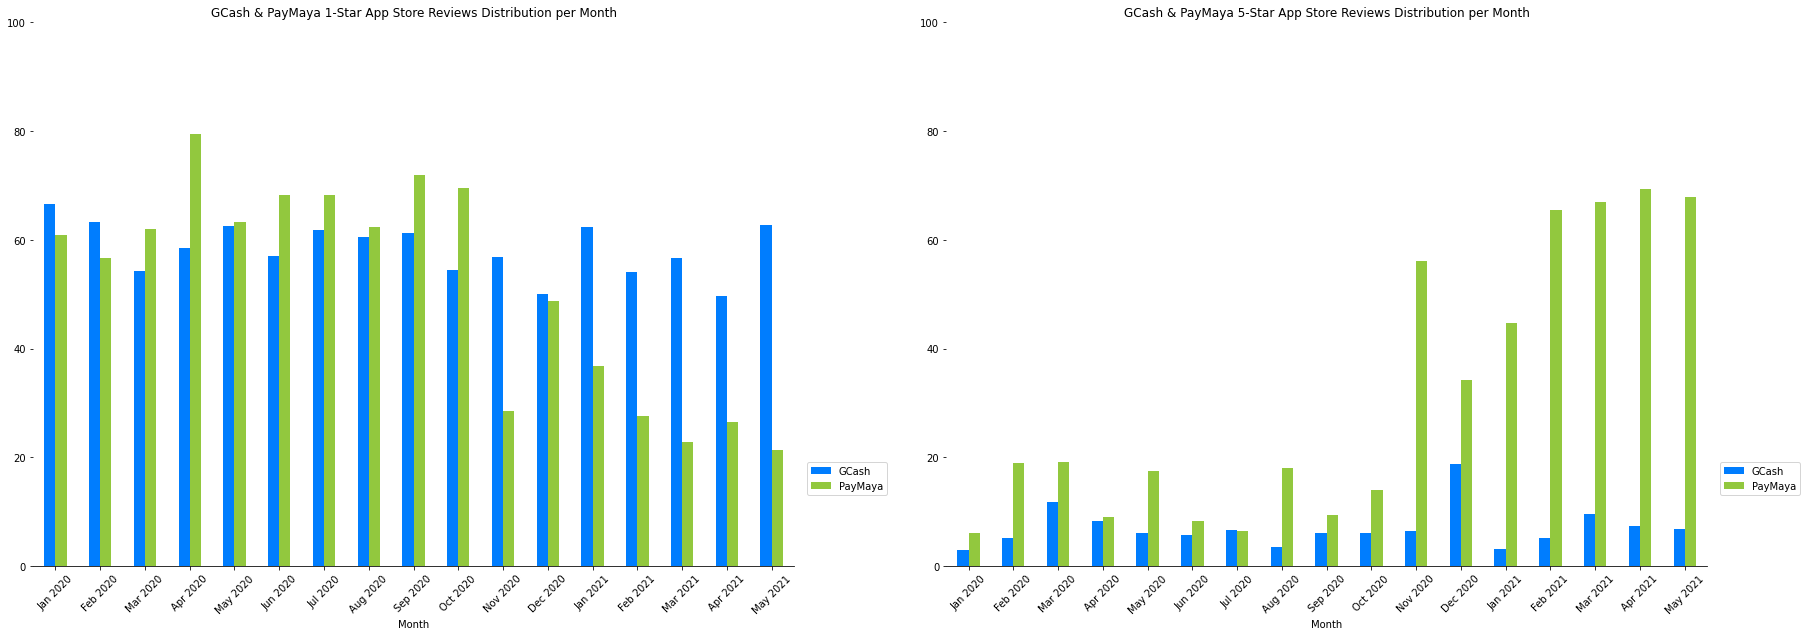

In [51]:
side_by_side(gcash_reviews_as, paymaya_reviews_as, gcash_paymaya, 'App Store')

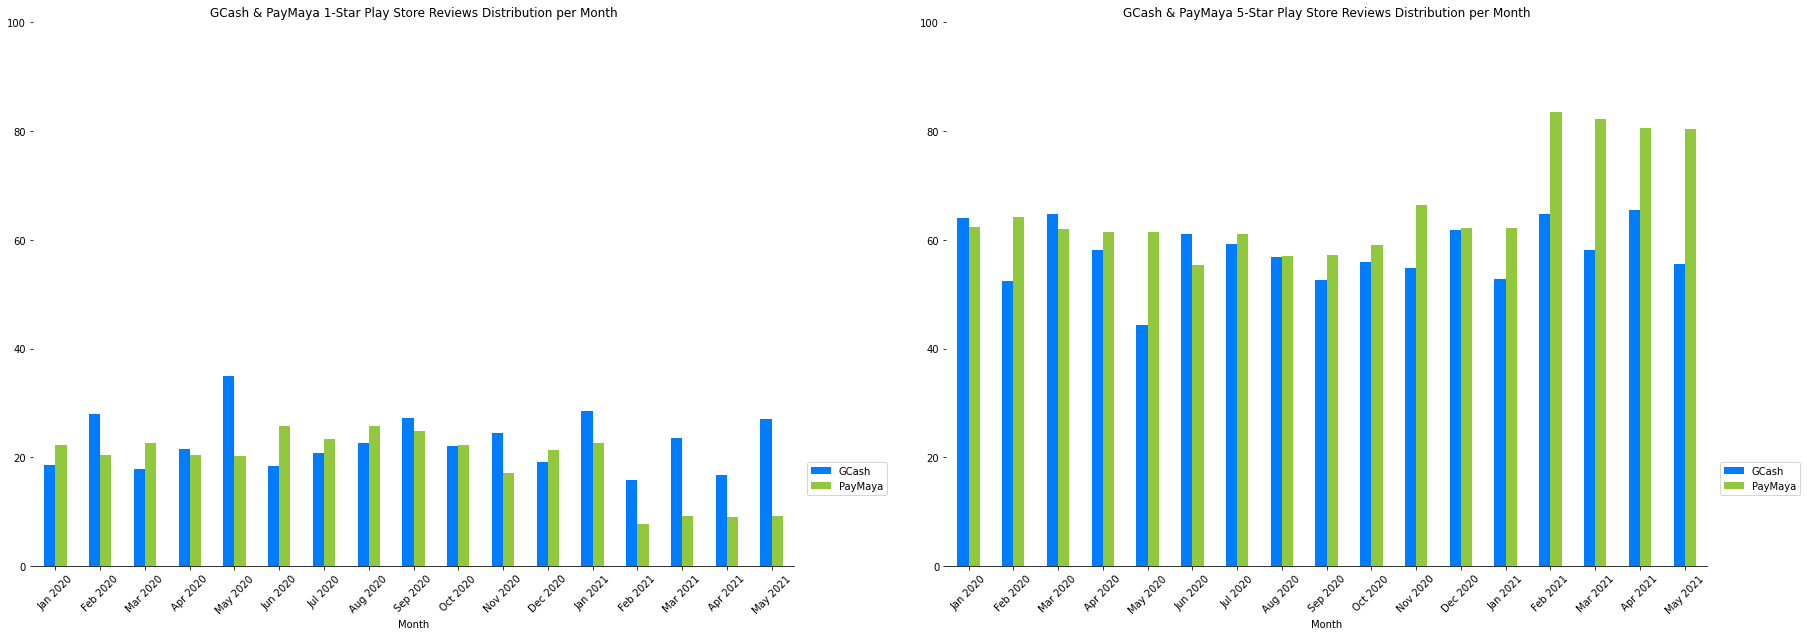

In [52]:
side_by_side(gcash_reviews_ps, paymaya_reviews_ps, gcash_paymaya, 'Play Store')

In [17]:
def stacked(df, color, title):
    start_date = "2020-01-01"
    end_date = "2021-05-31"
    
    # Limit dates
    df['date']= pd.to_datetime(df['date'])
    df = df.loc[(df['date'] >= start_date) & (df['date'] <= end_date)]

    df1 = df.rename(columns = {'date':'Month'}, inplace= False)
    df1 = df1.set_index('Month')
    group = df1.groupby([pd.Grouper(freq='M'), 'rating']).count().unstack(fill_value=0).stack()
    group = group.reset_index()
    group = group.pivot(index = 'Month', columns='rating', values='title_review')
    group['total'] = group.sum(axis=1)
    group[1] = (group[1]/group['total'])*100
    group[2] = (group[2]/group['total'])*100
    group[3] = (group[3]/group['total'])*100
    group[4] = (group[4]/group['total'])*100
    group[5] = (group[5]/group['total'])*100
    
    group = group[[1,5]]
        
    ax = group.plot(kind='bar', title = f'{title} 1 & 5-Star Reviews Distribution per Month',  
                    color = color, stacked=True, figsize=(10,10))
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_ylim([0,100])
    ax.legend(bbox_to_anchor= (1.05, 0.2))
    ax.set_xticklabels([x.strftime("%b %Y") for x in group.index], rotation=45)
    fig = ax.get_figure()
    fig.savefig(f'{title}_v2.png', bbox_inches='tight')

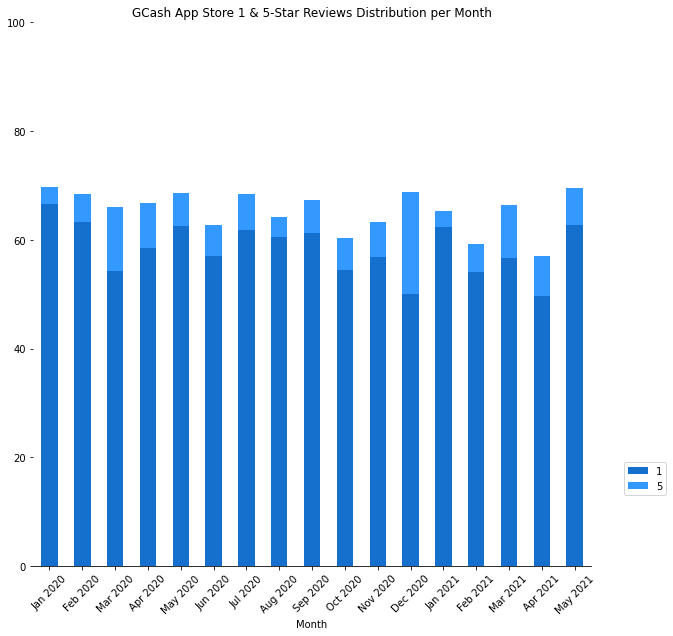

In [18]:
stacked(gcash_reviews_as, gcash_color, 'GCash App Store')

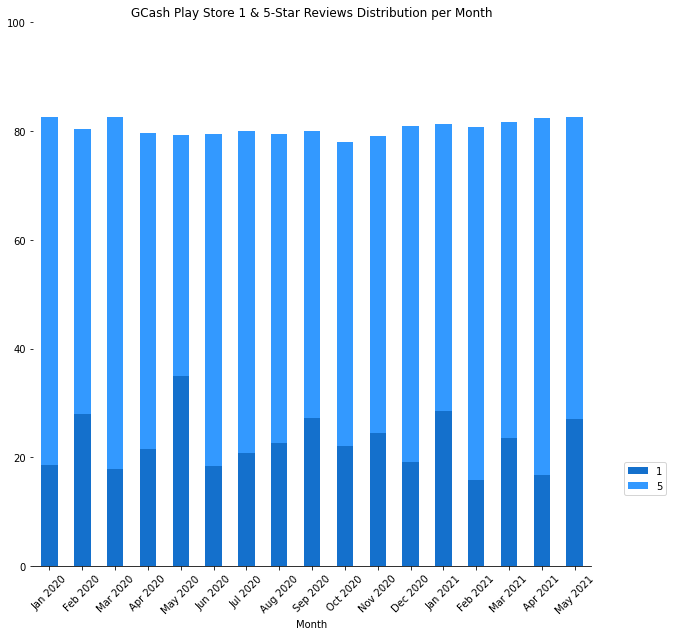

In [20]:
stacked(gcash_reviews_ps, gcash_color, 'GCash Play Store')

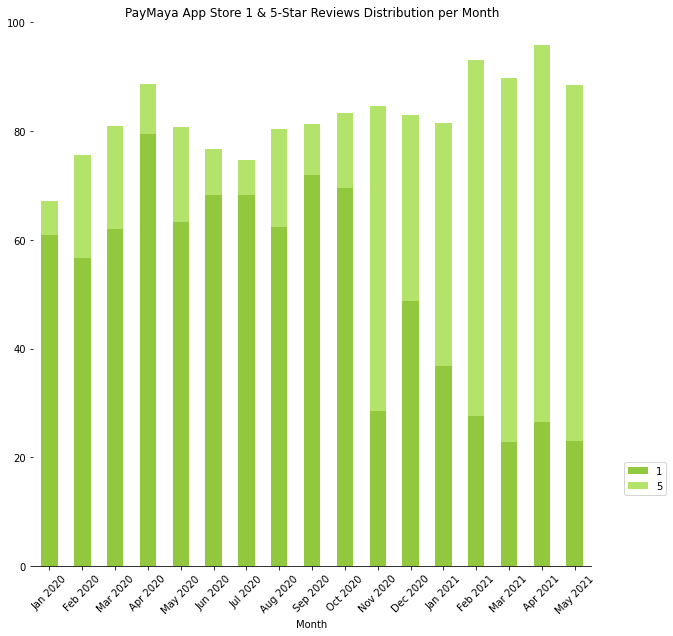

In [22]:
stacked(paymaya_reviews_as, paymaya_color, 'PayMaya App Store')

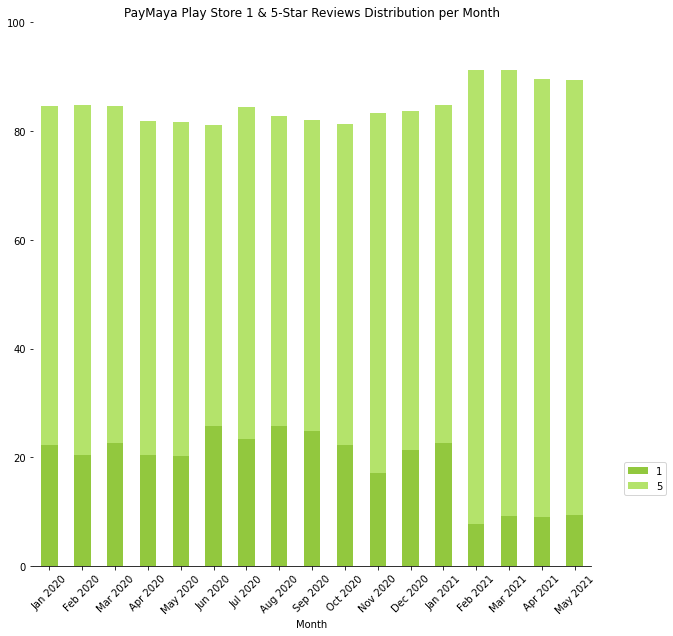

In [23]:
stacked(paymaya_reviews_ps, paymaya_color, 'PayMaya Play Store')

#### II. Preprocessing

Reference: 
1. https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0
---

##### A. Dropping blank rows, changing to lower case, expanding contractions, spell correction, and tokenization

In [22]:
def preprocess_a(corpus, column, mode):
    new_column = f"{column}_tokenized"
    corpus[column].dropna(inplace=True) # Drop blank rows
    corpus[column] = [entry.lower() for entry in corpus[column]] # Lowercase text
    corpus[column] = corpus[column].apply(lambda x: contractions.fix(x)) # Expand contractions
    corpus[column] = corpus[column].apply(lambda x: str(TextBlob(x))) # Correct spelling
    corpus[column] = corpus[column].str.replace('[^\w\s]','') # Remove punctuation
    
    if mode == 1:
        corpus[new_column] = [word_tokenize(entry) for entry in corpus[column]] # Tokenization

In [23]:
preprocess_a(gcash_reviews_as, 'title_review', 0)
preprocess_a(gcash_reviews_ps, 'title_review', 0)

In [11]:
preprocess_a(gcash_reviews_as, 'title_review', 1)
preprocess_a(paymaya_reviews_as, 'title_review', 1)

In [ ]:
preprocess_a(gcash_reviews_ps, 'title_review', 1)
preprocess_a(paymaya_reviews_ps, 'title_review', 1)

In [24]:
gcash_reviews_as

,date,rating,title_review
0,2018-12-29 15:24:59,3,it is starting to become pretty annoying almos...
1,2020-05-16 07:33:32,5,actually ok this app gets so many negative rev...
2,2020-02-04 00:25:57,3,cash in concern a little bit disappointed when...
3,2019-12-10 09:43:52,1,frustrating and slow and you are a bunch of th...
4,2018-06-26 18:43:31,1,payments do not post my payment via gcash did ...
...,...,...,...
4862,2016-01-16 11:52:50,1,fix this this is one of the crucial apps for g...
4863,2015-11-09 08:20:37,1,can not access because they can not process my...
4864,2015-09-19 14:58:01,1,waste of time downloading compatibility says c...
4865,2015-09-09 11:45:00,1,can not log in useless appcan not access my gc...


In [25]:
paymaya_reviews_as

,date,rating,title_review
0,2020-03-30 01:10:54,5,VERY BAD SERVICE I have been contacting them a...
1,2020-08-06 03:55:14,1,Very poor customer service There should be a z...
2,2020-05-02 01:58:12,1,App is great but service is not I really loved...
3,2020-04-09 01:32:02,1,Make your app trustworthy really Comeon this i...
4,2020-12-01 07:59:56,1,The new update... Ok so lets be honest I love ...
...,...,...,...
2564,2016-11-15 05:07:55,1,Verification code - time waster Your verificat...
2565,2015-11-29 18:38:50,4,"Nice One Very nice idea, we can buy now online..."
2566,2016-04-09 15:51:13,2,UPDATE PLEASE! Error occured when i'm trying t...
2567,2016-03-16 10:26:02,1,Am I doing something wrong I can't receive the...


In [15]:
gcash_reviews_ps

,date,rating,title_review,title_review_tokenized
0,2021-06-02 18:32:37,1,good for mobile online deals,"[good, for, mobile, online, deals]"
1,2021-06-02 18:32:14,1,ilang beses nang naulit na nag load ako nag ba...,"[ilang, beses, nang, naulit, na, nag, load, ak..."
2,2021-06-02 18:32:07,4,its a great experience and convenient,"[its, a, great, experience, and, convenient]"
3,2021-06-02 18:31:31,5,ok na ok sya para sa mga easy transaction lalo...,"[ok, na, ok, sya, para, sa, mga, easy, transac..."
4,2021-06-02 18:31:25,5,very helpful and contented,"[very, helpful, and, contented]"
...,...,...,...,...
176511,2019-04-03 09:46:14,5,i love it,"[i, love, it]"
176512,2019-04-03 09:38:52,4,i love the save money and invest feature of th...,"[i, love, the, save, money, and, invest, featu..."
176513,2019-04-03 09:38:16,1,amex does not work and support is basically br...,"[amex, does, not, work, and, support, is, basi..."
176514,2019-04-03 09:33:42,5,satisfied,[satisfied]


In [16]:
paymaya_reviews_ps

,date,rating,title_review,title_review_tokenized
0,2021-06-15T10:22:11.000Z,5,i rated 1 star yesterday and if there is lower...,"[i, rated, 1, star, yesterday, and, if, there,..."
1,2021-06-15T10:08:54.000Z,2,i can not do anything with my money it always ...,"[i, can, not, do, anything, with, my, money, i..."
2,2021-06-15T10:08:14.000Z,5,masyado na kaming maraming papel dito sa bahay...,"[masyado, na, kaming, maraming, papel, dito, s..."
3,2021-06-15T10:04:31.000Z,4,upgrading account and changing no is disappoin...,"[upgrading, account, and, changing, no, is, di..."
4,2021-06-15T09:56:32.000Z,5,I am super stressed with my past ewallet app s...,"[I, am, super, stressed, with, my, past, ewall..."
...,...,...,...,...
104558,2021-06-12T06:18:19.000Z,5,very good in service easy to send get cash,"[very, good, in, service, easy, to, send, get,..."
104559,2021-06-12T06:08:23.000Z,4,bakit walang alloutsurf sa load,"[bakit, walang, alloutsurf, sa, load]"
104560,2021-06-12T04:54:57.000Z,1,keep contacting the support about the duplicat...,"[keep, contacting, the, support, about, the, d..."
104561,2021-06-12T04:03:56.000Z,5,i like this apps promise,"[i, like, this, apps, promise]"


##### B. Filtering by date and ratings
---
Remove 2,3,4 star reviews and limit date to provided timeframe.

In [29]:
start_date = "2020-01-01"
end_date = "2021-05-31"

In [30]:
def preprocess_b(corpus, mode):
    corpus['date'] = pd.to_datetime(corpus['date'])
    corpus = corpus.loc[(corpus['date'] >= start_date) & (corpus['date'] <= end_date)]
    corpus = corpus.sort_values(by='date')
    
    if mode == 1:
        corpus_good = corpus.loc[corpus['rating'] == 5]
        corpus_bad = corpus.loc[corpus['rating'] == 1]
    else:
        corpus_good = corpus.loc[corpus['rating'] >= 4]
        corpus_bad = corpus.loc[corpus['rating'] <= 3]
    return corpus_good, corpus_bad

In [31]:
gcash_good_as_df, gcash_bad_as_df = preprocess_b(gcash_reviews_as, 0)
gcash_good_ps_df, gcash_bad_ps_df = preprocess_b(gcash_reviews_ps, 0)

In [35]:
gcash_df = [gcash_good_as_df, gcash_bad_as_df, gcash_good_ps_df, gcash_bad_ps_df]
joblib.dump(gcash_df, '../../Data/Preprocessed/Mico/EDA/gcash_df.sav')

['../../Data/Preprocessed/Mico/EDA/gcash_df.sav']

In [36]:
paymaya_good_as_df, paymaya_bad_as_df = preprocess_b(paymaya_reviews_as, 0)
paymaya_good_ps_df, paymaya_bad_ps_df = preprocess_b(paymaya_reviews_ps, 0)

In [37]:
paymaya_df = [paymaya_good_as_df, paymaya_bad_as_df, paymaya_good_ps_df, paymaya_bad_ps_df]
joblib.dump(paymaya_df, '../../Data/Preprocessed/Mico/EDA/paymaya_df.sav')

['../../Data/Preprocessed/Mico/EDA/paymaya_df.sav']

In [19]:
gcash_good_as_df, gcash_bad_as_df = preprocess_b(gcash_reviews_as)
paymaya_good_as_df, paymaya_bad_as_df = preprocess_b(paymaya_reviews_as)

In [20]:
gcash_good_ps_df, gcash_bad_ps_df = preprocess_b(gcash_reviews_ps)
paymaya_good_ps_df, paymaya_bad_ps_df = preprocess_b(paymaya_reviews_ps)

##### C. Removing stop words
---
Tagalog stopwords list from: https://github.com/stopwords-iso/stopwords-tl/blob/master/stopwords-tl.json

In [21]:
with open('../../Data/Stopwords/stopwords-custom.json') as file:
    custom_stopwords = json.load(file)

In [22]:
with open('../../Data/Stopwords/stopwords-tl.json') as file:
    tl_stopwords = json.load(file)

Since nltk does not contain Tagalog stopwords, we append the Tagalog stopwords to the built-in English stopwords to create a custom taglish_stopwords list

In [23]:
taglish_stopwords = stopwords.words('english')
taglish_stopwords.extend(tl_stopwords)
taglish_stopwords.extend(custom_stopwords)
taglish_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [25]:
def df_to_words(df):
    data = df.title_review_tokenized.values.tolist()
    return data

In [26]:
def remove_stopwords(entry):
    return [[word for word in simple_preprocess(str(doc)) if word not in taglish_stopwords] for doc in entry]

In [27]:
def make_ngrams(data, entry):
    bigram = gensim.models.Phrases(data, min_count=5, threshold=20) # higher threshold fewer phrases.
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    bigrams = [bigram_mod[doc] for doc in entry]
    
    return bigrams

In [28]:
def preprocess_b(corpus):
    data = df_to_words(corpus)
    data_nstops = remove_stopwords(data)
    bigrams = make_ngrams(data, data_nstops)
    return bigrams

In [29]:
gcash_good_as = preprocess_b(gcash_good_as_df)
gcash_bad_as = preprocess_b(gcash_bad_as_df)
paymaya_good_as = preprocess_b(paymaya_good_as_df)
paymaya_bad_as = preprocess_b(paymaya_bad_as_df)

In [30]:
gcash_good_ps = preprocess_b(gcash_good_ps_df)
gcash_bad_ps = preprocess_b(gcash_bad_ps_df)
paymaya_good_ps = preprocess_b(paymaya_good_ps_df)
paymaya_bad_ps = preprocess_b(paymaya_bad_ps_df)

In [31]:
gcash_good_as_df['title_review_tokenized'] = gcash_good_as
gcash_bad_as_df['title_review_tokenized'] = gcash_bad_as
gcash_good_ps_df['title_review_tokenized'] = gcash_good_ps
gcash_bad_ps_df['title_review_tokenized'] = gcash_bad_ps

In [32]:
paymaya_good_as_df['title_review_tokenized'] = paymaya_good_as
paymaya_bad_as_df['title_review_tokenized'] = paymaya_bad_as
paymaya_good_ps_df['title_review_tokenized'] = paymaya_good_ps
paymaya_bad_ps_df['title_review_tokenized'] = paymaya_bad_ps

In [33]:
gcash_df = [gcash_good_as_df, gcash_bad_as_df, gcash_good_ps_df, gcash_bad_ps_df]
paymaya_df = [paymaya_good_as_df, paymaya_bad_as_df, paymaya_good_ps_df, paymaya_bad_ps_df]

#### D. Data Transformation: Corpus and Dictionary
---

In [34]:
def data_transform(data, store):
    id2word = corpora.Dictionary(data)
    if store == 'as':
        id2word.filter_extremes(no_below = 5, no_above = 0.5, keep_n=100000)
    else:
        id2word.filter_extremes(no_below = 15, no_above = 0.5, keep_n=100000)
    texts = data
    corpus = [id2word.doc2bow(text) for text in texts]
    
    return id2word, corpus

In [35]:
gcash_good_dict_as, gcash_good_corpus_as = data_transform(gcash_good_as, 'as')
gcash_bad_dict_as, gcash_bad_corpus_as = data_transform(gcash_bad_as, 'as')
paymaya_good_dict_as, paymaya_good_corpus_as = data_transform(paymaya_good_as, 'as')
paymaya_bad_dict_as, paymaya_bad_corpus_as = data_transform(paymaya_bad_as, 'as')

In [36]:
gcash_good_dict_ps, gcash_good_corpus_ps = data_transform(gcash_good_ps, 'ps')
gcash_bad_dict_ps, gcash_bad_corpus_ps = data_transform(gcash_bad_ps, 'ps')
paymaya_good_dict_ps, paymaya_good_corpus_ps = data_transform(paymaya_good_ps, 'ps')
paymaya_bad_dict_ps, paymaya_bad_corpus_ps = data_transform(paymaya_bad_ps, 'ps')

##### D. Saving the files
---

In [37]:
gcash_good_file = [gcash_good_as, gcash_good_dict_as, gcash_good_corpus_as, 
                   gcash_good_ps, gcash_good_dict_ps, gcash_good_corpus_ps]
gcash_bad_file = [gcash_bad_as, gcash_bad_dict_as, gcash_bad_corpus_as,
                  gcash_bad_ps, gcash_bad_dict_ps, gcash_bad_corpus_ps]
paymaya_good_file = [paymaya_good_as, paymaya_good_dict_as, paymaya_good_corpus_as, 
                   paymaya_good_ps, paymaya_good_dict_ps, paymaya_good_corpus_ps]
paymaya_bad_file = [paymaya_bad_as, paymaya_bad_dict_as, paymaya_bad_corpus_as,
                  paymaya_bad_ps, paymaya_bad_dict_ps, paymaya_bad_corpus_ps]

In [38]:
joblib.dump(gcash_good_file, '../../Data/Preprocessed/Mico/P2/gcash_good.sav')
joblib.dump(gcash_bad_file, '../../Data/Preprocessed/Mico/P2/gcash_bad.sav')
joblib.dump(paymaya_good_file, '../../Data/Preprocessed/Mico/P2/paymaya_good.sav')
joblib.dump(paymaya_bad_file, '../../Data/Preprocessed/Mico/P2/paymaya_bad.sav')
joblib.dump(gcash_df, '../../Data/Preprocessed/Mico/P2/gcash_df.sav')
joblib.dump(paymaya_df, '../../Data/Preprocessed/Mico/P2/paymaya_df.sav')

['../../Data/Preprocessed/Mico/P2/paymaya_df.sav']